In [1]:
%matplotlib inline
import pandas as pd

In [2]:
#make pandas dataframe more readable ---- like showing below
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### How many movies are listed in the titles dataframe?

In [5]:
titles.title.count()

230621

### What are the earliest two films listed in the titles dataframe?

In [6]:
titles.sort('year').head(2)

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,year
176477,Miss Jerry,1894
213694,The Startled Lover,1898


### How many movies have the title "Hamlet"?

In [7]:
Hamlet = titles.title == 'Hamlet'

In [10]:
sum(Hamlet)

18

### How many movies are titled "North by Northwest"?

In [11]:
NBN = titles.title == 'North by Northwest'

In [12]:
sum(NBN)

1

### When was the first movie titled "Hamlet" made?

In [14]:
titles[Hamlet].sort('year').head(1)

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,year
46365,Hamlet,1910


### List all of the "Treasure Island" movies from earliest to most recent.

In [15]:
TS = titles.title == 'Treasure Island'

In [16]:
titles[TS].sort('year')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,year
204540,Treasure Island,1918
50896,Treasure Island,1920
189691,Treasure Island,1934
96259,Treasure Island,1950
59186,Treasure Island,1972
110576,Treasure Island,1973
203909,Treasure Island,1985
178072,Treasure Island,1999


### How many movies were made in the year 1950?

In [18]:
movies1950 = titles.year == 1950

In [20]:
sum(movies1950)

1093

### How many movies were made in the year 1960?

In [21]:
movies1960 = titles.year == 1960

In [22]:
sum(movies1960)

1496

### How many movies were made from 1950 through 1959?

In [24]:
titles.decades = titles.year // 10 * 10

In [26]:
sum(titles.decades == 1950)

12656

### In what years has a movie titled "Batman" been released?

In [27]:
batman = titles.title == 'Batman'

In [143]:
titles[batman]

,title,year
55577,Batman,1989
74047,Batman,1943


### How many roles were there in the movie "Inception"?

In [32]:
IP = cast.title == 'Inception'

In [38]:
cast[IP].name.count()

77

### How many roles in the movie "Inception" are NOT ranked by an "n" value?

In [66]:
nn = cast[IP].n.isnull()

In [72]:
cast[IP][nn].name.count()

26

### But how many roles in the movie "Inception" did receive an "n" value?

In [75]:
nn = cast[IP].n.notnull()

In [76]:
cast[IP][nn].n.count()

51

### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.

In [77]:
c = (cast.title == 'North by Northwest') & (cast.n.notnull())

In [79]:
cast[c].sort('n')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,year,name,type,character,n
840374,North by Northwest,1959,Cary Grant,actor,Roger O. Thornhill,1.0
3361396,North by Northwest,1959,Eva Marie Saint,actress,Eve Kendall,2.0
1404704,North by Northwest,1959,James Mason,actor,Phillip Vandamm,3.0
3024085,North by Northwest,1959,Jessie Royce Landis,actress,Clara Thornhill,4.0
343701,North by Northwest,1959,Leo G. Carroll,actor,The Professor,5.0
2923056,North by Northwest,1959,Josephine Hutchinson,actress,Mrs. Townsend,6.0
1634552,North by Northwest,1959,Philip Ober,actor,Lester Townsend,7.0
1229083,North by Northwest,1959,Martin Landau,actor,Leonard,8.0
2357939,North by Northwest,1959,Adam Williams,actor,Valerian,9.0
1746383,North by Northwest,1959,Edward Platt,actor,Victor Larrabee,10.0


### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".

In [80]:
c = (cast.title == 'Sleuth') & (cast.year == 1972)

In [81]:
cast[c].sort('n')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,year,name,type,character,n
1644328,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
314691,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
360365,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1412647,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
2619278,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
1396572,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0


### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".

In [82]:
c = (cast.title == 'Sleuth') & (cast.year == 2007)

In [83]:
cast[c].sort('n')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,year,name,type,character,n
314692,Sleuth,2007,Michael Caine,actor,Andrew,1.0
1246855,Sleuth,2007,Jude Law,actor,Milo,2.0
1741124,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
250297,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
360366,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
2619277,Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
3223502,Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


### How many roles were credited in the silent 1921 version of Hamlet?

In [93]:
c = (cast.title == 'Hamlet') & (cast.year == 1921)

In [94]:
cast[c].character.count()

9

### How many roles were credited in Branagh’s 1996 Hamlet?

In [97]:
c = (cast.title == 'Hamlet') & (cast.year == 1996)

In [98]:
cast[c].character.count()

54

### How many "Hamlet" roles have been listed in all film credits through history?

In [144]:
c = cast.character == 'Hamlet'

In [145]:
cast[c].character.count()

91

### How many people have played an "Ophelia"?

In [102]:
c = cast.character == 'Ophelia'

In [105]:
cast[c].character.count()

111

### How many people have played a role called "The Dude"?

In [106]:
c = cast.character == 'The Dude'

In [107]:
cast[c].character.count()

18

### How many people have played a role called "The Stranger"?

In [108]:
c = cast.character == 'The Stranger'

In [109]:
cast[c].character.count()

208

### How many roles has Sidney Poitier played throughout his career?

In [110]:
c = cast.name == 'Sidney Poitier'

In [111]:
cast[c].character.count()

43

### How many roles has Judi Dench played?

In [112]:
c = cast.name == 'Judi Dench'

In [113]:
cast[c].character.count()

55

### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.

In [114]:
cast.decades = cast.year // 10 * 10
c = (cast.n == 2) & (cast.name == 'Cary Grant') & (cast.decades == 1940)

In [116]:
cast[c].sort('year')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,year,name,type,character,n
840371,My Favorite Wife,1940,Cary Grant,actor,Nick,2.0
840381,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


### List the leading roles that Cary Grant played in the 1940s in order by year.

In [119]:
cast.decades = cast.year // 10 * 10
c = (cast.n == 1) & (cast.name == 'Cary Grant') & (cast.decades == 1940)

In [121]:
cast[c].sort('year')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,year,name,type,character,n
840397,The Howards of Virginia,1940,Cary Grant,actor,Matt Howard,1.0
840353,His Girl Friday,1940,Cary Grant,actor,Walter Burns,1.0
840399,The Philadelphia Story,1940,Cary Grant,actor,C. K. Dexter Haven,1.0
840386,Suspicion,1941,Cary Grant,actor,Johnnie,1.0
840401,The Talk of the Town,1942,Cary Grant,actor,Leopold Dilg,1.0
840377,Once Upon a Honeymoon,1942,Cary Grant,actor,Patrick 'Pat' O'Toole,1.0
840344,Destination Tokyo,1943,Cary Grant,actor,Capt. Cassidy,1.0
840369,Mr. Lucky,1943,Cary Grant,actor,Joe Adams,1.0
840370,Mr. Lucky,1943,Cary Grant,actor,Joe Bascopolous,1.0
840378,Once Upon a Time,1944,Cary Grant,actor,Jerry Flynn,1.0


### How many roles were available for actors in the 1950s?

In [125]:
cast.decades = cast.year // 10 * 10
c = (cast.type == 'actor') & (cast.decades == 1950)

In [127]:
cast[c].character.count()

154727

### How many roles were avilable for actresses in the 1950s?

In [130]:
cast.decades = cast.year // 10 * 10
c = (cast.type == 'actress') & (cast.decades == 1950)

In [131]:
cast[c].character.count()

56259

### How many leading roles (n=1) were available from the beginning of film history through 1980?

In [148]:
#cast.decades = cast.year // 10 * 10
c = (cast.n == 1) & (cast.year <= 1980)

In [149]:
cast[c].character.count()

63924

### How many non-leading roles were available through from the beginning of film history through 1980?

In [150]:
#cast.decades = cast.year // 10 * 10
c = (cast.n != 1) & (cast.year <= 1980)

In [151]:
cast[c].character.count()

1094780

### How many roles through 1980 were minor enough that they did not warrant a numeric "n" rank?

In [152]:
#cast.decades = cast.year // 10 * 10
c = (cast.n.isnull()) & (cast.year <= 1980)

In [153]:
cast[c].character.count()

438086

CPU times: user 120 ms, sys: 4 ms, total: 124 ms
Wall time: 126 ms


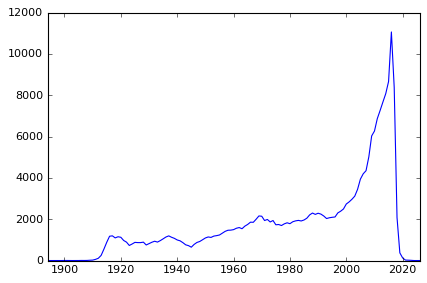

In [19]:
%%time
#sort_index --> sort use index
titles.year.value_counts().sort_index().plot()

In [31]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['year']).n.max()
c.groupby(c.year // 10 * 10).n.size()

year
1980     2
1990    14
2000    20
2010    11
dtype: int64

In [36]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27099
      actress     15484
1920  actor       47783
      actress     23526
1930  actor      149800
      actress     49060
1940  actor      160460
      actress     50911
1950  actor      154727
      actress     56259
1960  actor      130593
      actress     55862
1970  actor      149433
      actress     64843
1980  actor      193482
      actress     89223
1990  actor      258799
      actress    122359
2000  actor      484890
      actress    260766
2010  actor      682777
      actress    382812
2020  actor         129
      actress        62
dtype: int64

In [46]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
c = c.groupby(['character', c.year // 10 * 10]).size()
c

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [51]:
c.unstack(0)

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN
